# Sentiment

The following Jupyter notebook extracts the final dataframe and looks into the sentiment assigned to the processed comments through a pre-trained HuggingFace transformer. Visualizations of the sentiment analysis has been stored in the folder 'outputs'.

In [1]:
import pandas as pd
import numpy as np

# Load the processed data
df = pd.read_pickle("../data/df_final.pkl")

In [4]:
df.head()

,processed_comment,commentId,docketId,documentId,postedDate,agency
0,RE Docket EPAR10OAR20190710 Federal Register N...,EPA-R10-OAR-2019-0710-0076,EPA-R10-OAR-2019-0710,NaN,2020-02-28 05:00:00+00:00,EPA
1,"People ask why the EPA is gutting regulations,...",EPA-R10-OAR-2019-0710-0077,EPA-R10-OAR-2019-0710,NaN,2020-02-28 05:00:00+00:00,EPA
2,Cache Valley needs access to Tier 3 gasoline A...,EPA-R10-OAR-2020-0190-0016,EPA-R10-OAR-2020-0190,NaN,2021-02-24 05:00:00+00:00,EPA
3,While attainment may appear to have been achie...,EPA-R10-OAR-2020-0190-0017,EPA-R10-OAR-2020-0190,NaN,2021-02-24 05:00:00+00:00,EPA
4,Yes. I agree that we should commend achievemen...,EPA-R10-OAR-2020-0190-0018,EPA-R10-OAR-2020-0190,NaN,2021-02-24 05:00:00+00:00,EPA


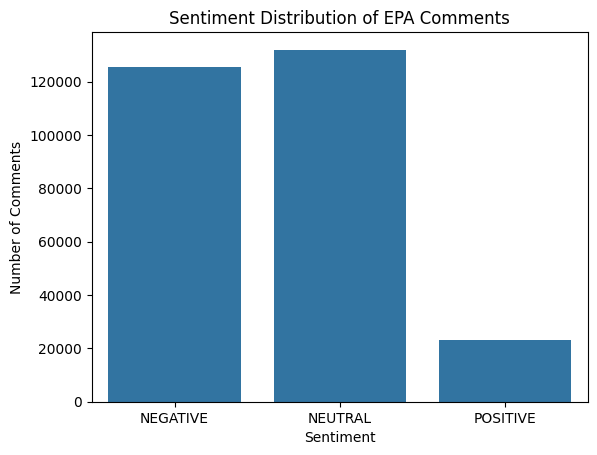

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_text', data=df, order=["NEGATIVE", "NEUTRAL", "POSITIVE"])
plt.title("Sentiment Distribution of EPA Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.savefig("../outputs/sentiment_distribution.png", dpi=300)
plt.show()


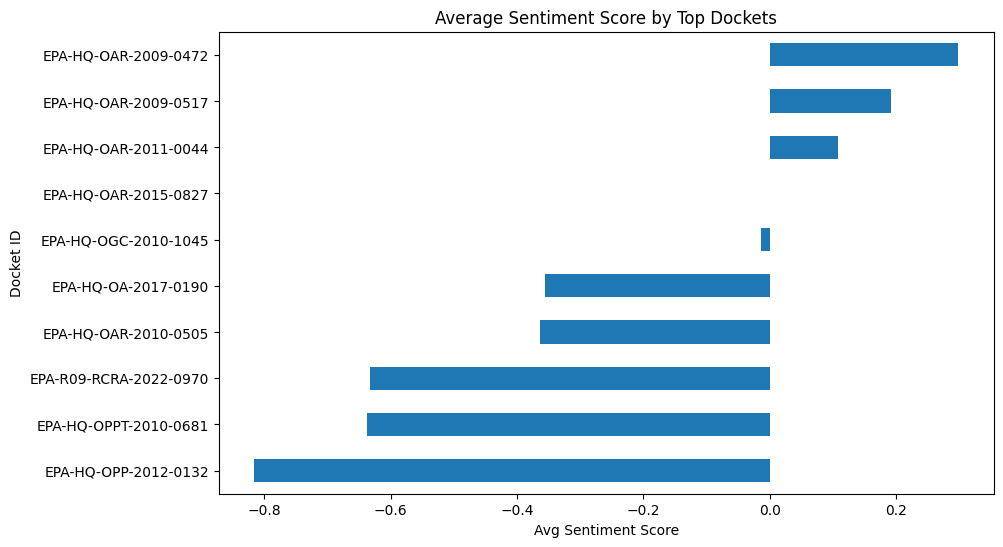

In [3]:
top_dockets = df["docketId"].value_counts().head(10).index
docket_sentiment = df[df["docketId"].isin(top_dockets)].groupby("docketId")["sentiment_score"].mean().sort_values()

docket_sentiment.plot(kind="barh", title="Average Sentiment Score by Top Dockets", figsize=(10, 6))
plt.xlabel("Avg Sentiment Score")
plt.ylabel("Docket ID")
plt.savefig("../outputs/sentiment_top_dockets.png", dpi=300)
plt.show()

/tmp/ipykernel_559305/1863180584.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["postedDate"].dt.to_period("M")


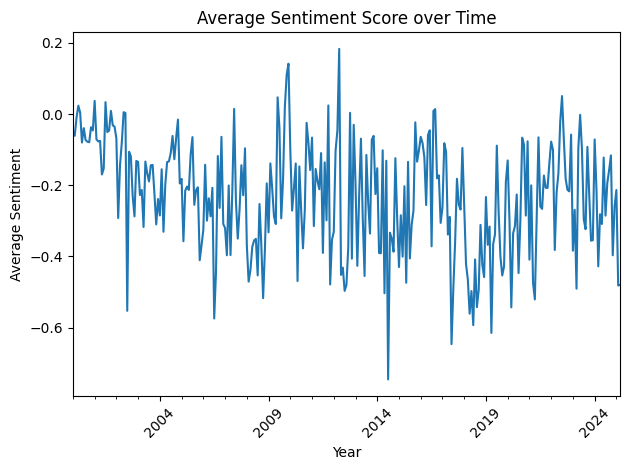

In [4]:
df["postedDate"] = pd.to_datetime(df["postedDate"])
df["month"] = df["postedDate"].dt.to_period("M")
monthly_sentiment = df.groupby("month")["sentiment_score"].mean()

monthly_sentiment.plot(title="Average Sentiment Score over Time")
plt.ylabel("Average Sentiment")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/sentiment_time.png", dpi=300)
plt.show()

TypeError: 'list' object is not callable

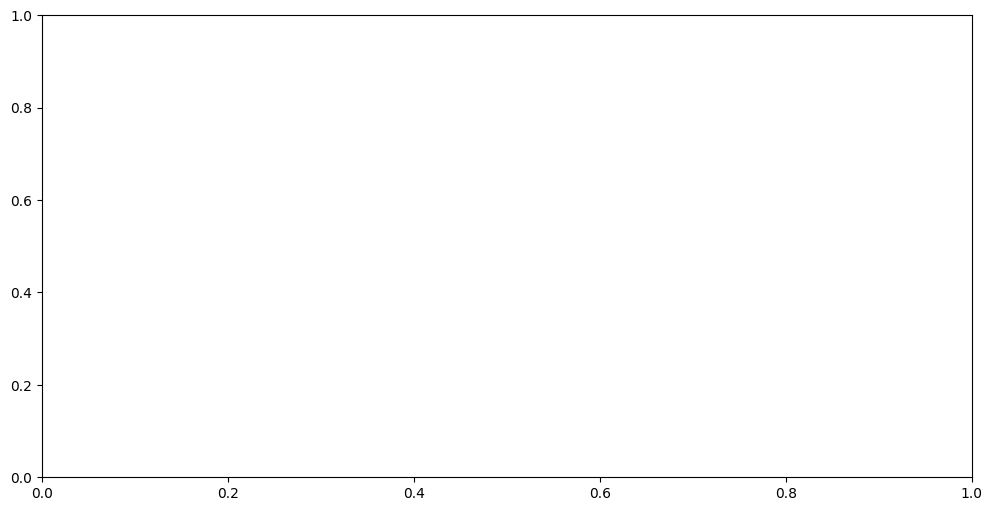

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure sentiment_text column exists
assert "sentiment_text" in df.columns

# Step 1: Count sentiment per docket
docket_sentiment_counts = df.groupby(["docketId", "sentiment_text"]).size().reset_index(name="count")

# Step 2: Pivot into wide format
pivot_df = docket_sentiment_counts.pivot(index="docketId", columns="sentiment_text", values="count").fillna(0)

# Step 3: Normalize to proportions
proportions_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 4: Pick top N dockets to visualize
top_dockets = df["docketId"].value_counts().head(10).index
proportions_df = proportions_df.loc[top_dockets]

# Step 5: Plot as stacked bar chart
proportions_df[["NEGATIVE", "NEUTRAL", "POSITIVE"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap=["#D55E00", "#999999", "#009E73"]
)

plt.ylabel("Proportion of Comments")
plt.title("Relative Sentiment Proportions by Docket")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.savefig("../outputs/relative_sentiment_top10.png", dpi=300)
plt.show()